In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import linregress
import scipy.stats as sps
import cmocean

# Первое домашнее задание - Шмаков В.Е, ФФКЭ, гр. Б04-105

### Упражнение 1 -  Numpy


__1.1__

Пусть у двух матриц совпадает количество строк. Объедините их в одну горизонтально (объедините столбцы этих матриц)

In [2]:
str_q = 10
shape_1, shape_2 = (str_q, 50), (str_q, 40)
matrix_1, matrix_2 = np.random.random(shape_1), np.random.random(shape_2)
print(f'Размеры исходных матриц dim A = {matrix_1.shape}, dim B = {matrix_2.shape}')
merged_matrix = np.hstack([matrix_1, matrix_2])
print(f'Размер итоговой матрицы dim (hstack(A, B)) = {merged_matrix.shape}')

Размеры исходных матриц dim A = (10, 50), dim B = (10, 40)
Размер итоговой матрицы dim (hstack(A, B)) = (10, 90)


__1.2__

Пусть дана пuтру-матрица $M$ и два массива индексов $a, b$ одинаковой длины. Постройте массив элементов $M[a[0], b[0]], M[a[1], b[1]], \ldots$ Указание: для выполнения этой операции не требуется никаких именных функций.

In [3]:
M_shape = (5, 7)
index_list_size = 9
M = (np.random.rand(*M_shape) * 20).astype(np.int64)
a = (np.random.random(index_list_size) * (M_shape[0] - 1)).astype(np.int64)
b = (np.random.random(index_list_size) * (M_shape[1] - 1)).astype(np.int64)
result = M[a, b]
print("Исходная матрица \n", M)
print("Массив индексов a: \n", a)
print("Массив индексов b: \n", b)
print("Результирующий массив \n", result)

Исходная матрица 
 [[ 4  4 12  2 17  2  3]
 [ 0  8 15 16 18 19 17]
 [18  3 14  4 11 18  4]
 [ 9 10 19  6 15 15  9]
 [10 13 13  1 14 15  1]]
Массив индексов a: 
 [2 1 3 1 2 2 1 0 3]
Массив индексов b: 
 [3 2 0 1 5 5 0 2 5]
Результирующий массив 
 [ 4 15  9  8 18 18  0 12 15]


__1.3__

Подсчитайте след матрицы и количество ненулевых элементов на ее диагонали

In [4]:
M_shape = (5, 5)
M = (np.random.rand(*M_shape) * 3).astype(np.int64)
print("Исходная матрица \n", M)
print(f"След матрицы M: {np.trace(M)} \nКоличество ненулевых элементов на диоганали: {np.sum(np.diagonal(M).astype(bool))}")

Исходная матрица 
 [[1 1 2 0 2]
 [0 2 0 2 1]
 [1 1 0 1 0]
 [1 0 2 1 1]
 [2 1 0 2 2]]
След матрицы M: 6 
Количество ненулевых элементов на диоганали: 4


__1.4__

Даны два произвольных numpy-массива одинаковой размерности $(n, m)$. Замените нулями те элементы второго массива, для которых на соответствующем месте в первом массиве находятся отрицательные числа

In [5]:
shape = (5, 2)
matrix_1, matrix_2 = np.random.normal(loc = 0, scale = 30, size = shape).astype(np.int64), np.random.normal(loc = 0, scale = 30, size = shape).astype(np.int64) 
print("Первый массив\n", matrix_1)
print("Второй массив\n", matrix_2)
matrix_2[matrix_1 < 0] = 0
print("Второй массив после замены\n", matrix_2)

Первый массив
 [[  7  -4]
 [-45  21]
 [  5  13]
 [ 39 -43]
 [ -4 -30]]
Второй массив
 [[ 47   5]
 [ 60  43]
 [ 40   9]
 [-16  45]
 [ 18  -3]]
Второй массив после замены
 [[ 47   0]
 [  0  43]
 [ 40   9]
 [-16   0]
 [  0   0]]


__1.5__

Даны две матрицы с одинаковым количеством строк и количеством столбцов $n$ и $m$ соответственно. Постройте матрицу $n \times m$ всевозможных произведений столбцов друг на друга (в смысле скалярного произведения).

Думаю имеется ввиду матрица размером $m \times m$

In [6]:
shape = (2, 2)
matrix_1, matrix_2 = np.random.normal(loc = 0, scale = 5, size = shape).astype(np.int64), np.random.normal(loc = 0, scale = 5, size = shape).astype(np.int64) 
print("Первый массив\n", matrix_1)
print("Второй массив\n", matrix_2)

result = np.tensordot(matrix_1, matrix_2, axes = (0, 0))
print("Результат\n", result)

Первый массив
 [[-4 -1]
 [ 3 -1]]
Второй массив
 [[ 0  7]
 [ 7 12]]
Результат
 [[ 21   8]
 [ -7 -19]]


### Упражнение 2

__1.1__

Построю кривые лиссажу

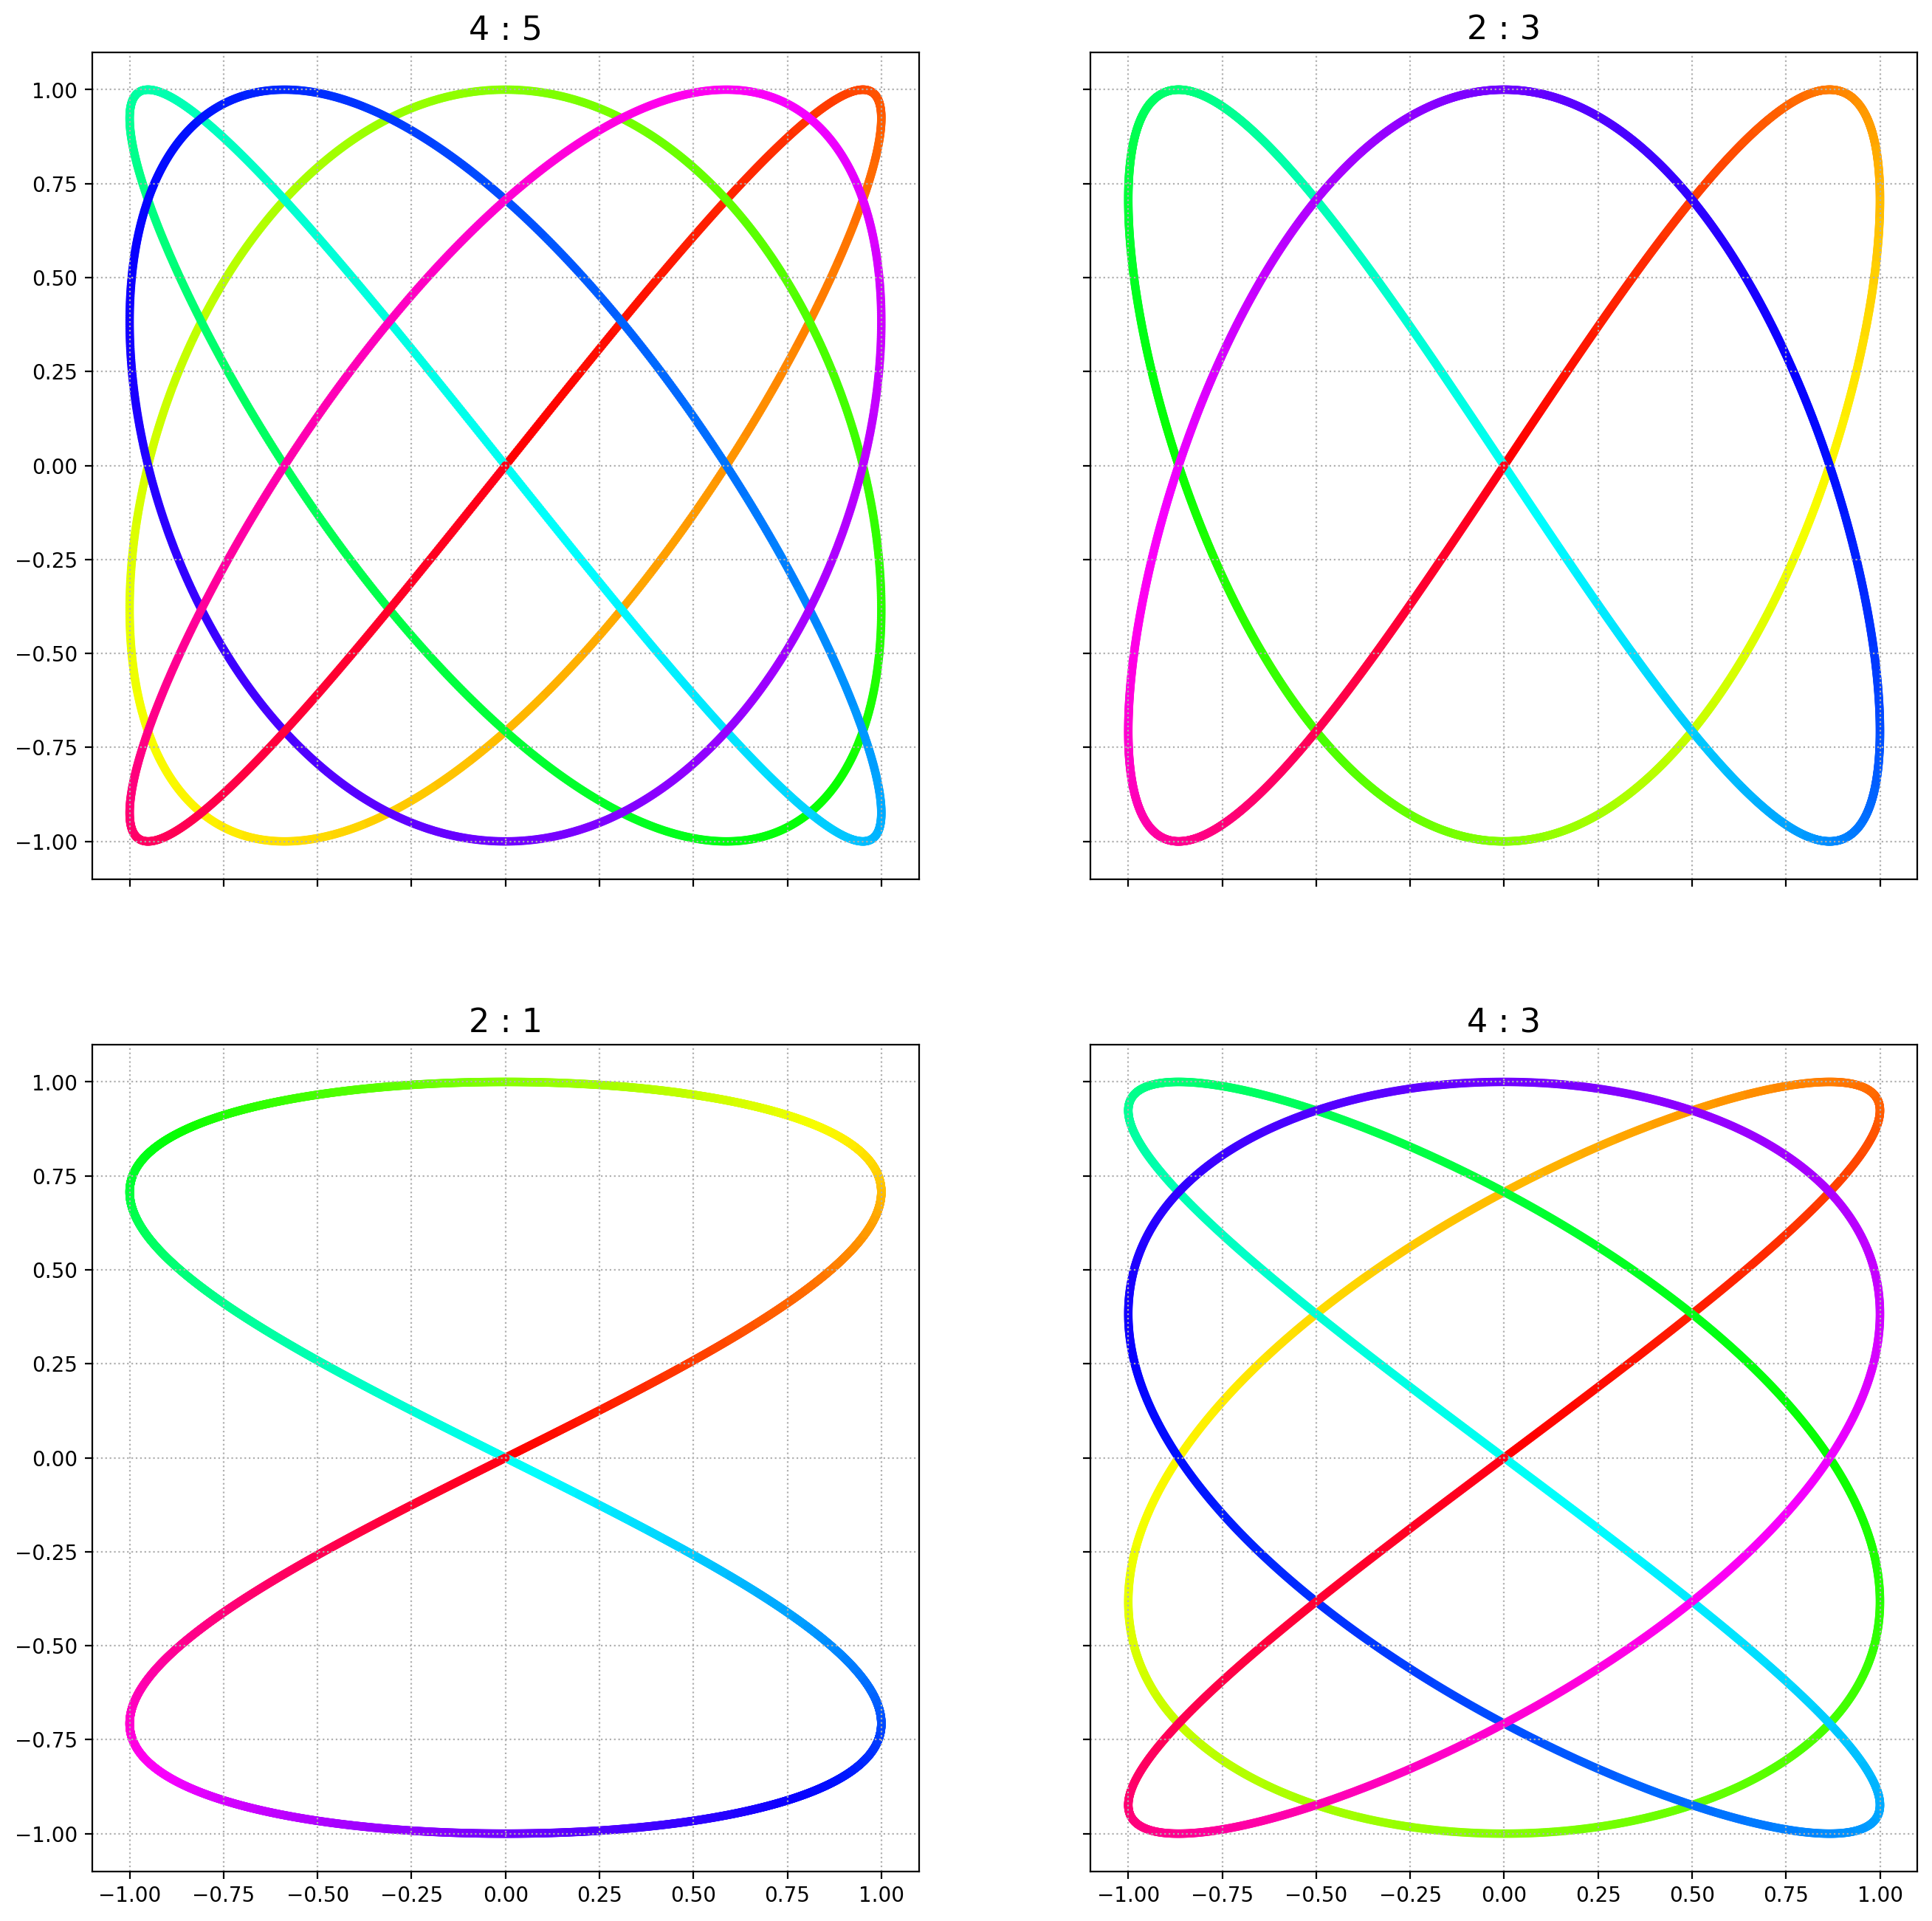

In [7]:
ratios = [(4, 5), (2, 1), (2, 3), (4, 3)]
fig, ax = plt.subplots(2, 2, figsize = (16, 16), dpi = 200, sharex = True, sharey = True)
time = np.linspace(0, 2 * np.pi, 5000)
for ind, ratio in enumerate(ratios):
    plotable = ax[ind % 2][ind // 2]
    plotable.set_aspect('equal')
    plotable.grid(ls = ':')
    plotable.scatter(np.sin(ratio[0] * time), 
                     np.sin(ratio[1] * time), 
                     color = cm.hsv(time / (2 * np.pi)),
                     s = 10)
    plotable.set_title(f'{ratio[0]} : {ratio[1]}', fontsize = 16)


__2.2__

Постройте график с крестами ошибок

Возьму данные из лабораторной работы https://github.com/ShmakovVladimir/Labs/blob/master/%D0%9E%D0%BF%D1%82%D0%B8%D0%BA%D0%B0/%D0%94%D0%B8%D1%84%D1%80%D0%B0%D0%BA%D1%86%D0%B8%D1%8F%20%D1%81%D0%B2%D0%B5%D1%82%D0%B0%20%D0%BD%D0%B0%20%D1%83%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D0%B7%D0%B2%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B9%20%D0%B2%D0%BE%D0%BB%D0%BD%D0%B5%20%D0%B2%20%D0%B6%D0%B8%D0%B4%D0%BA%D0%BE%D1%81%D1%82%D0%B8/%D0%94%D0%B8%D1%84%D1%80%D0%B0%D0%BA%D1%86%D0%B8%D1%8F%20%D1%81%D0%B2%D0%B5%D1%82%D0%B0%20%D0%BD%D0%B0%20%D1%83%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D0%B7%D0%B2%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B9%20%D0%B2%D0%BE%D0%BB%D0%BD%D0%B5.pdf

In [8]:


def plotXbyM(freq: float, x: np.ndarray, m: np.ndarray):
    x *= 4 #перевод из делений в микрометры
    xAx = np.linspace(-3,3,4000)
    MNK = linregress(m,x)
    fig, ax = plt.subplots(figsize = (12,5), dpi = 200)
    plt.errorbar(x = m,
                 y = x,
                 xerr = [0 for _ in m],
                 yerr = [20 for _ in x],
                 fmt = '_',
                 label = 'Экспериментальные данные')
    plt.plot(xAx,
             MNK.slope*xAx+MNK.intercept,
             label = r"Линейная интерполяция, $\alpha = {} \pm {}$".format(round(MNK.slope),round(MNK.stderr/1)*1),
             color = 'pink')
    plt.xlabel("Порядок максимума $m$")
    plt.ylabel(r"Координата максимума $x_{m} \ мкм$")
    plt.title(r"Зависимость $x(m)$ при частоте: $\nu = {} \ мГц$".format(freq))
    plt.grid()
    plt.xticks(m)
    plt.xlim((min(m) - 0.25,max(m) + 0.25))
    plt.ylim((-600,600))
    plt.yticks(np.arange(-600,600,100))
    plt.legend()
    plt.show()
    return MNK



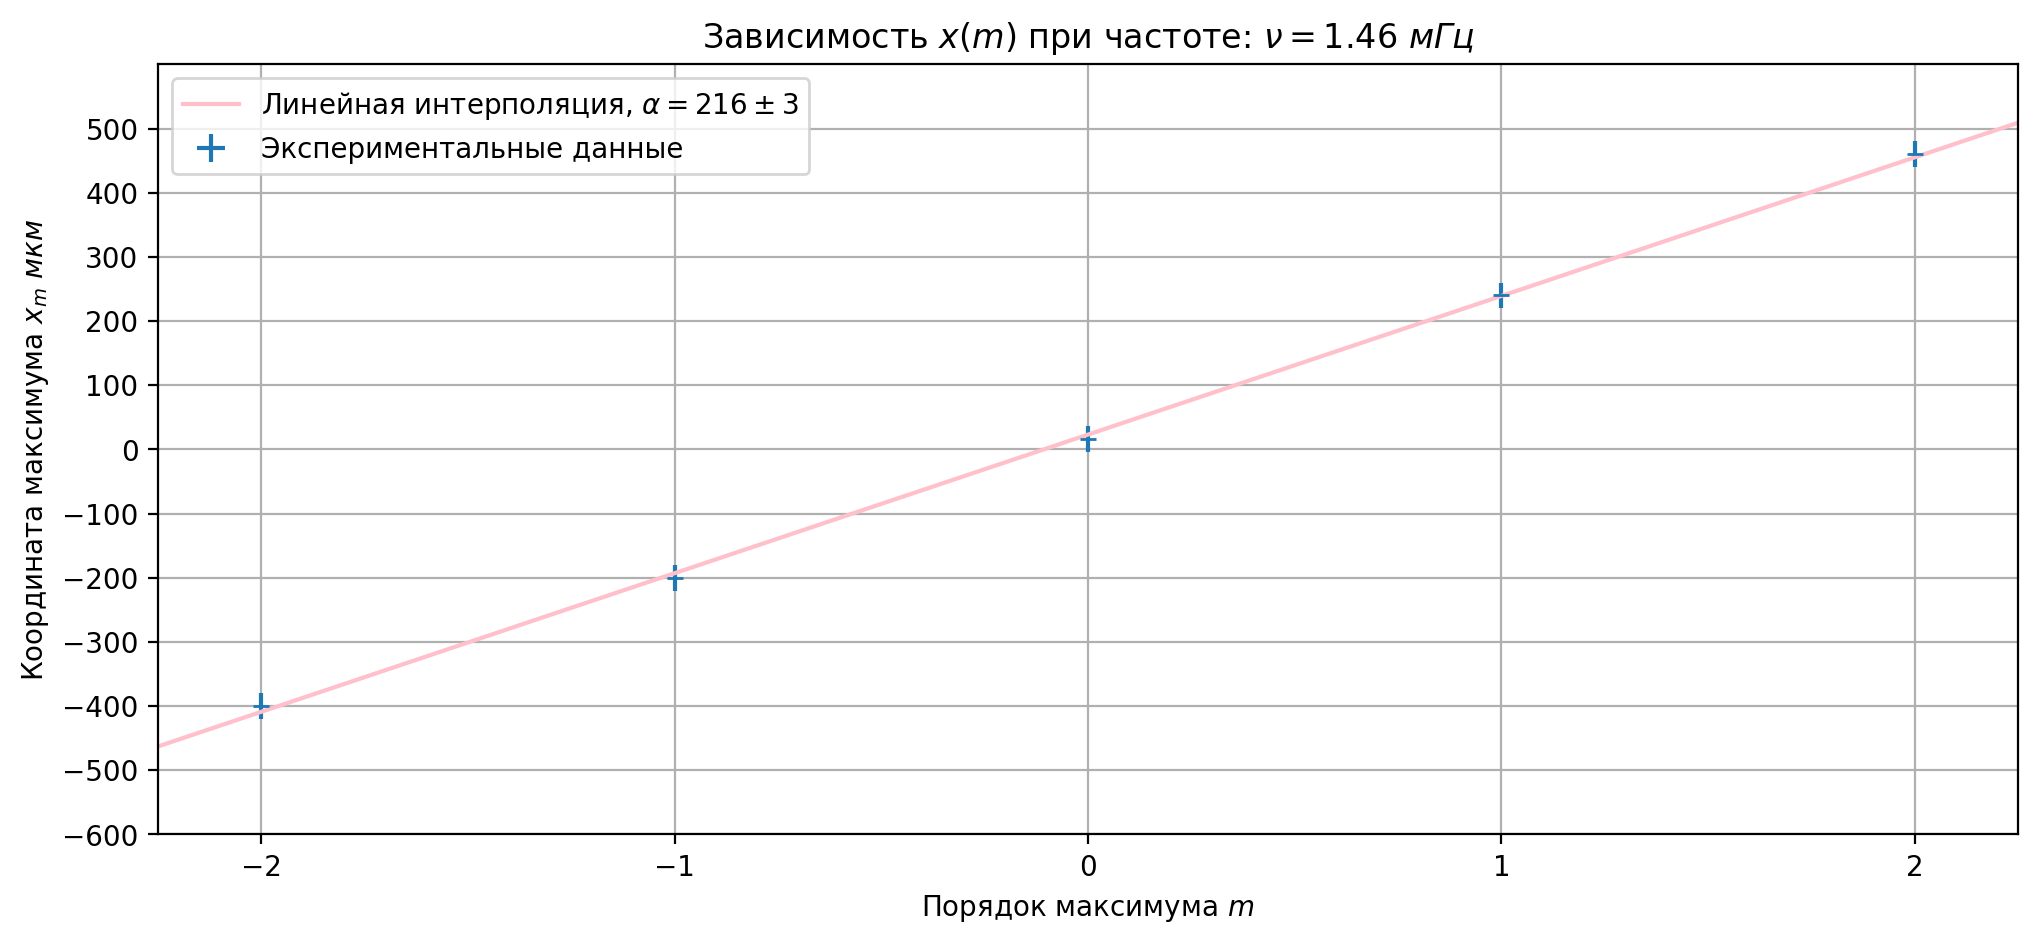

In [9]:
freq = 1.46
x = np.array([-100,-50,4,60,115])
m = np.array([-2,-1,0,1,2])
plotXbyM(freq,x,m);

__2.3__

Постройте график в логарифмическом масштабе без явного вычисления логарифмов

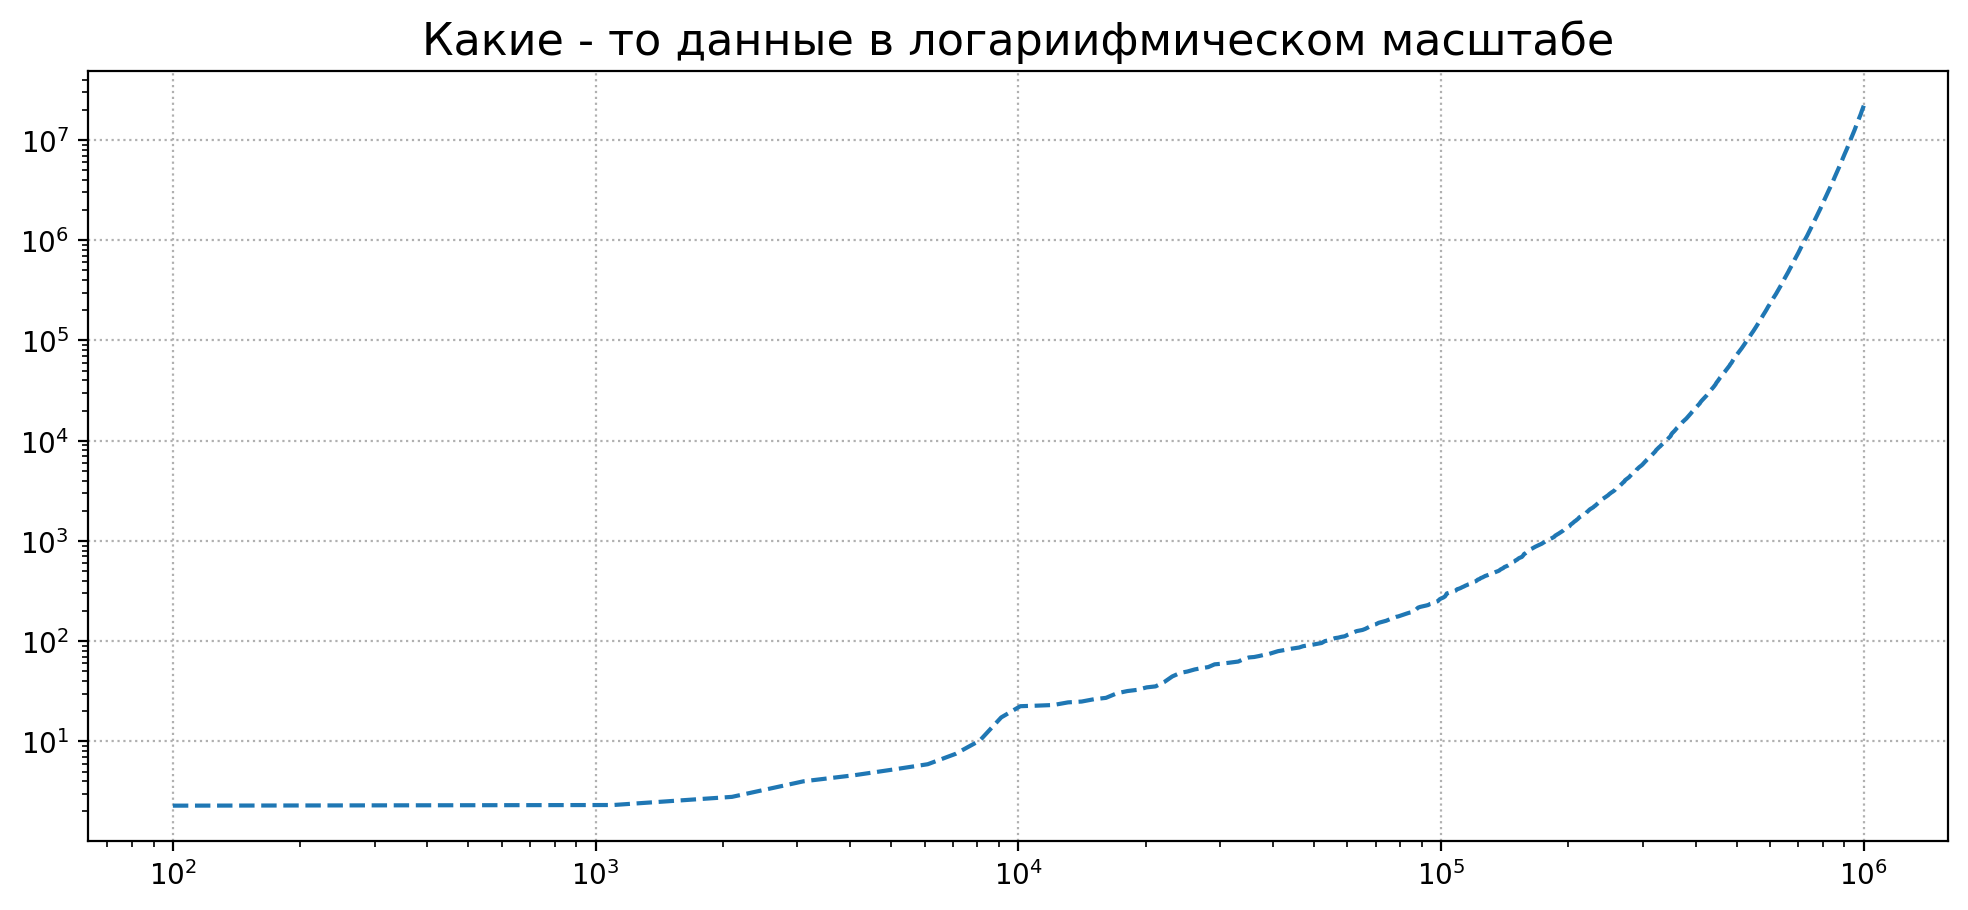

In [10]:
x = np.linspace(1e2, 1e6, 1000)
y = np.sort(np.random.rand(*x.shape) * 1e3) * np.exp(x / 1e5)
plt.figure(figsize = (12, 5), dpi = 200)
plt.loglog(x, y, ls = '--')
plt.title("Какие - то данные в логариифмическом масштабе", fontsize = 16)
plt.grid(ls = ':')

### Упражнение 6

__6.1__

Сгенерируйте случайную матрицу $N \times N$, в которой каждый элемент взят из гауссова нормального распределения с фиксированными параметрами. Сделайте из этой матрицы симметричную, добавив к ней ее транспонированную. Постройте гистограмму собственных значений получившейся матрицы (подберите достаточно большое $N$ и удачное количество бинов). Повторите эксперимент $M$ раз ( $M \sim 50$, здесь цикл разрешается) и отобразите разброс высоты каждого бина гистограммы с помощью креста ошибок.

In [11]:
eigenvals = []
N, M = 400, 100
for _ in range(M):
    A = np.random.normal(loc = 0, scale = 20, size = (N, N))
    A += A.T
    eigenvals.append(np.linalg.eigvals(A))
eigenvals = np.array(eigenvals)

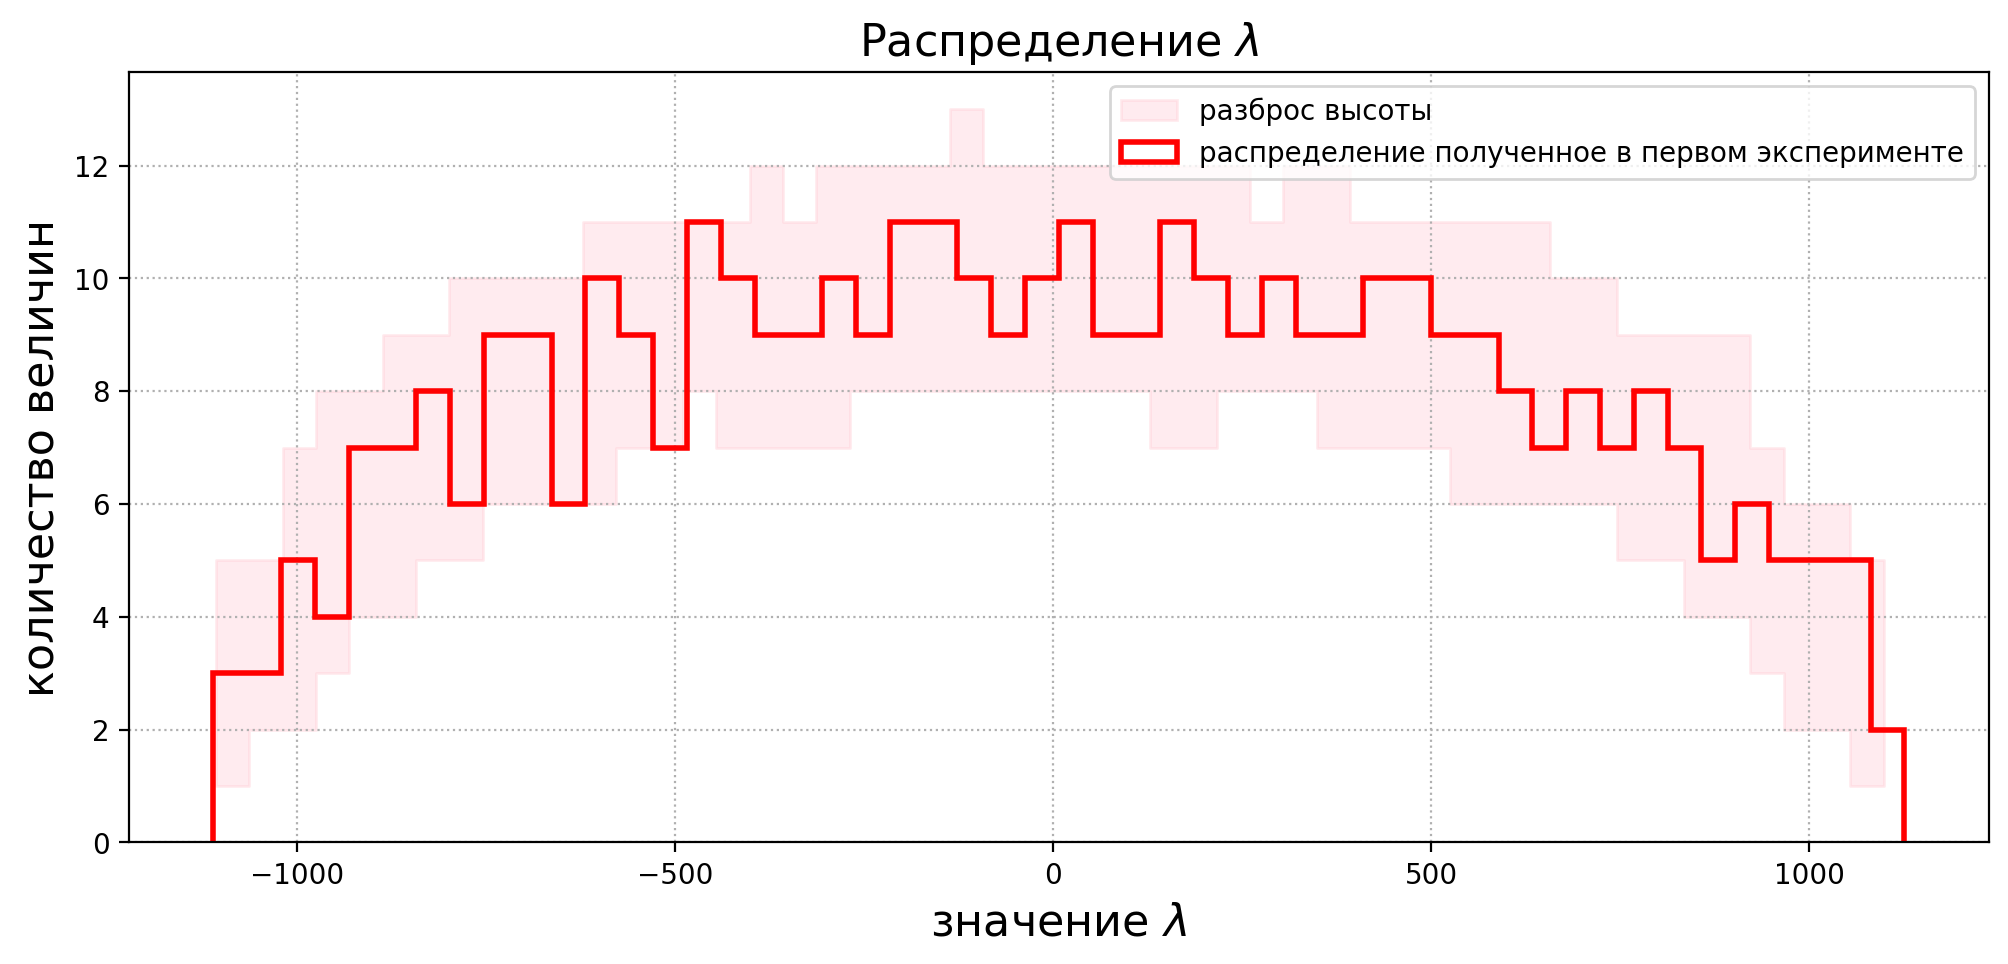

In [12]:
plt.figure(figsize = (12, 5), dpi  = 200)
q_values = []
binq = 50
for val in eigenvals:
    q, edges = np.histogram(val, bins = binq)
    q_values.append(q)
q_values = np.array(q_values)
centers = (edges[:-1] + edges[1:]) / 2
x = np.sort(np.hstack([edges[:-1], centers, edges[1:]]))


plt.fill_between(x, 
                 y1 = np.repeat(np.min(q_values, axis = 0), 3), 
                 y2 = np.repeat(np.max(q_values, axis = 0), 3),
                 alpha = 0.3,
                 label = 'разброс высоты',
                 color = 'pink')

plt.hist(eigenvals[0], 
         bins = binq, 
         histtype = 'step',
         label = 'распределение полученное в первом эксперименте',
         linewidth = 2,
         color = 'red')


plt.grid(ls = ':')
plt.title("Распределение $\lambda$", fontsize = 16)
plt.xlabel("значение $\lambda$", fontsize = 16)
plt.ylabel("количество величин", fontsize = 16)
plt.legend();

__6.2__

(Wigner surmise) Постройте гистограмму расстояний $\rho$ между ближайшими собственными числами матрицы. Для этого для случайной симметричной матрицы отсортируйте ее собственные числа $\lambda_i$ и посчитайте все $\rho_i=\lambda_{i+1}-\lambda_i$. Для улучшения качества можно повторить эксперимент $m$ раз и объединить все наборы $\left\{\rho_i\right\}$.

In [13]:
eigenvals_sorted = np.sort(eigenvals, axis = 1)
rho = np.roll(eigenvals_sorted, -1, axis = 1) - eigenvals_sorted 
rho = rho[:, :-1]

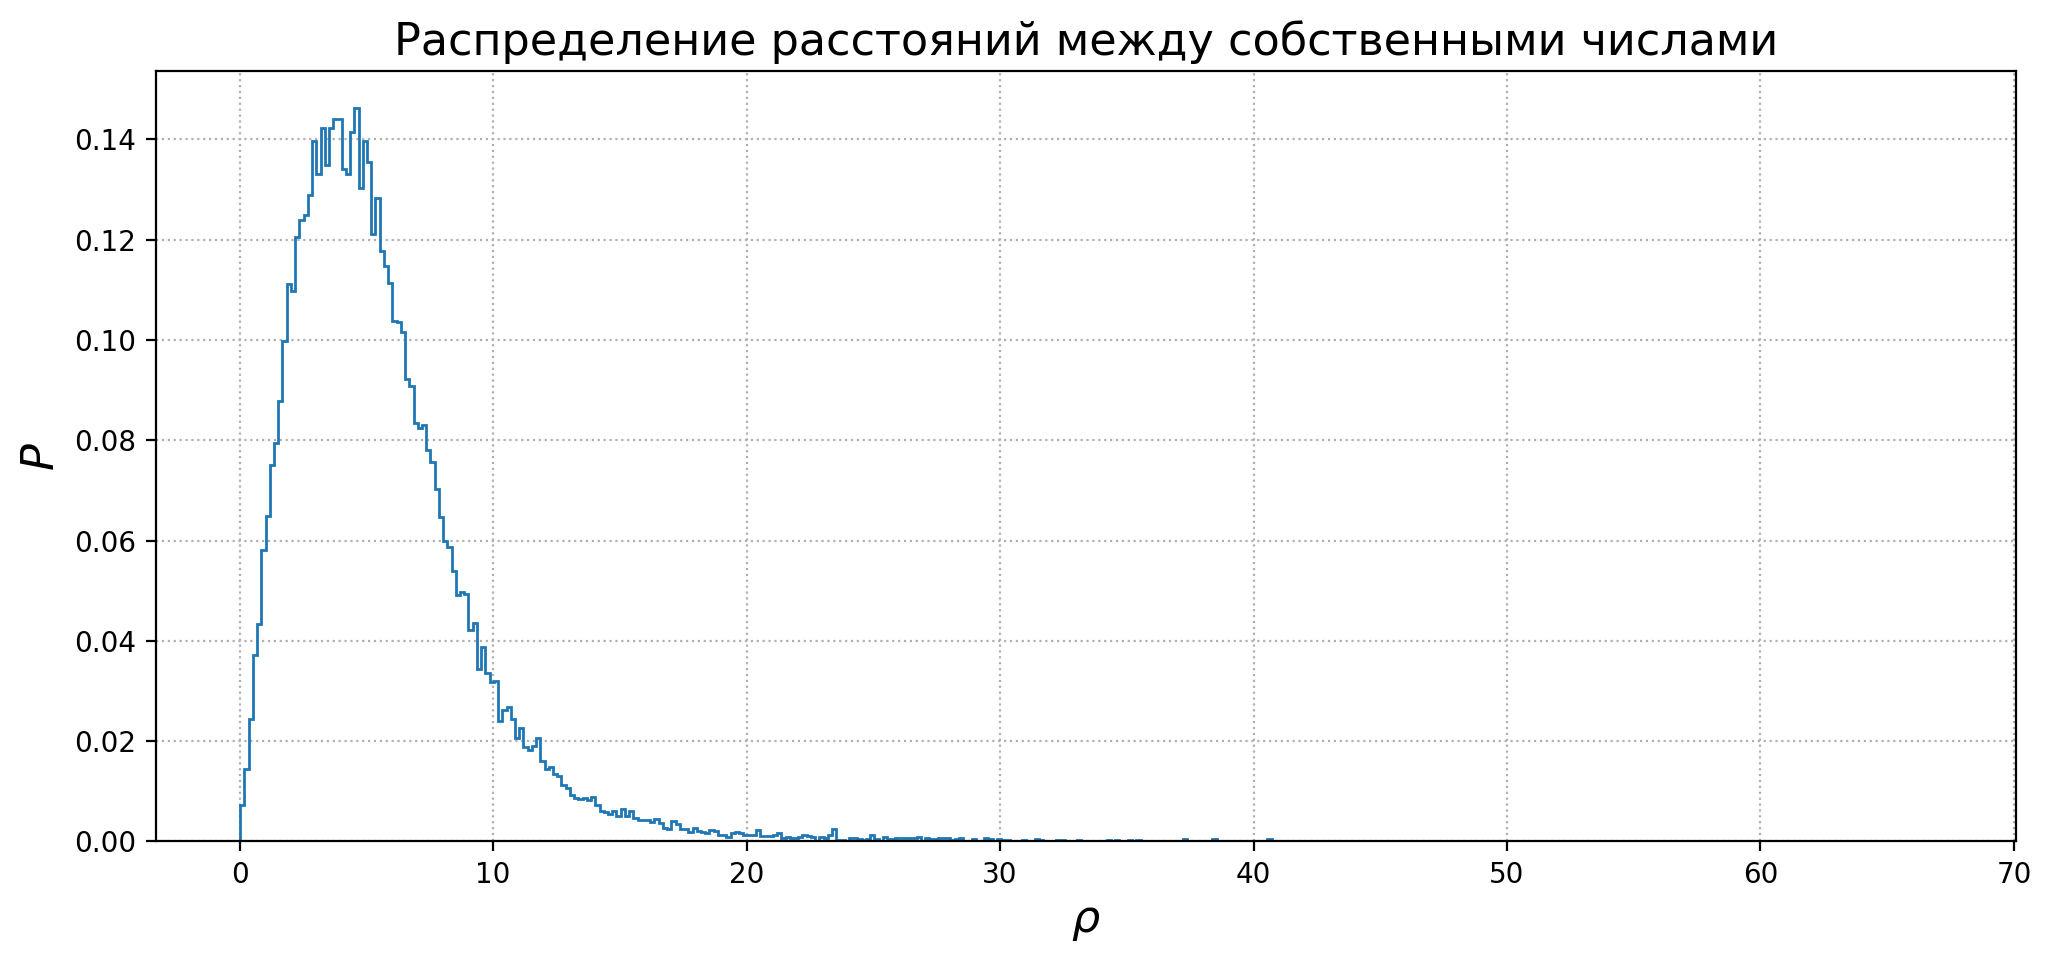

In [14]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(rho.ravel(), bins = 400, histtype = 'step', density = True)
plt.title("Распределение расстояний между собственными числами", fontsize = 16)
plt.xlabel(r"$\rho$", fontsize = 16)
plt.ylabel(r"$P$", fontsize = 16)
plt.grid(ls = ':')

__6.3__

Случайная величина $\rho$ из предыдущего пункта имеет плотность вероятности $f(\rho)$. Построенная в п. 2 гистограмма должна приближаться к функции $f(\rho)$ при больших $N$ и $m$. Пользуясь гистограммой, определите поведение (асимптотику) $f(\rho)$ на маленьких и больших $\rho$. На основании этого предложите вид функциональной зависимости, который может приблизить $f(\rho)$. Достаточно предложить функцию $\tilde{f}_{c_1, c_2, \ldots}(\rho)$, где $c_1, c_2, \ldots$ некоторое (небольшое) количество параметров, так что $\tilde{f}(\rho)$ неплохо приближает гистограмму при некоторых $c_i$.

На графике выше виден характерный экспоненциальный спад. Такой спад характерен для плотностей нормального, экспоненциального и гамма распределений. 

Нормальное распределение наврядли подойдёт для интерполяции зависимости $f(\rho)$. Так как функция нормального распределения <<симметричная>>. Экспоненциальное распределение слишком <<угловатое>> и не позволит приблизить плавный рост $f(\rho)$. 

Предположу что $\rho \sim \Gamma$, и попробую подобрать параметры искомого гамма-распределения методом максимального правдоподобия:

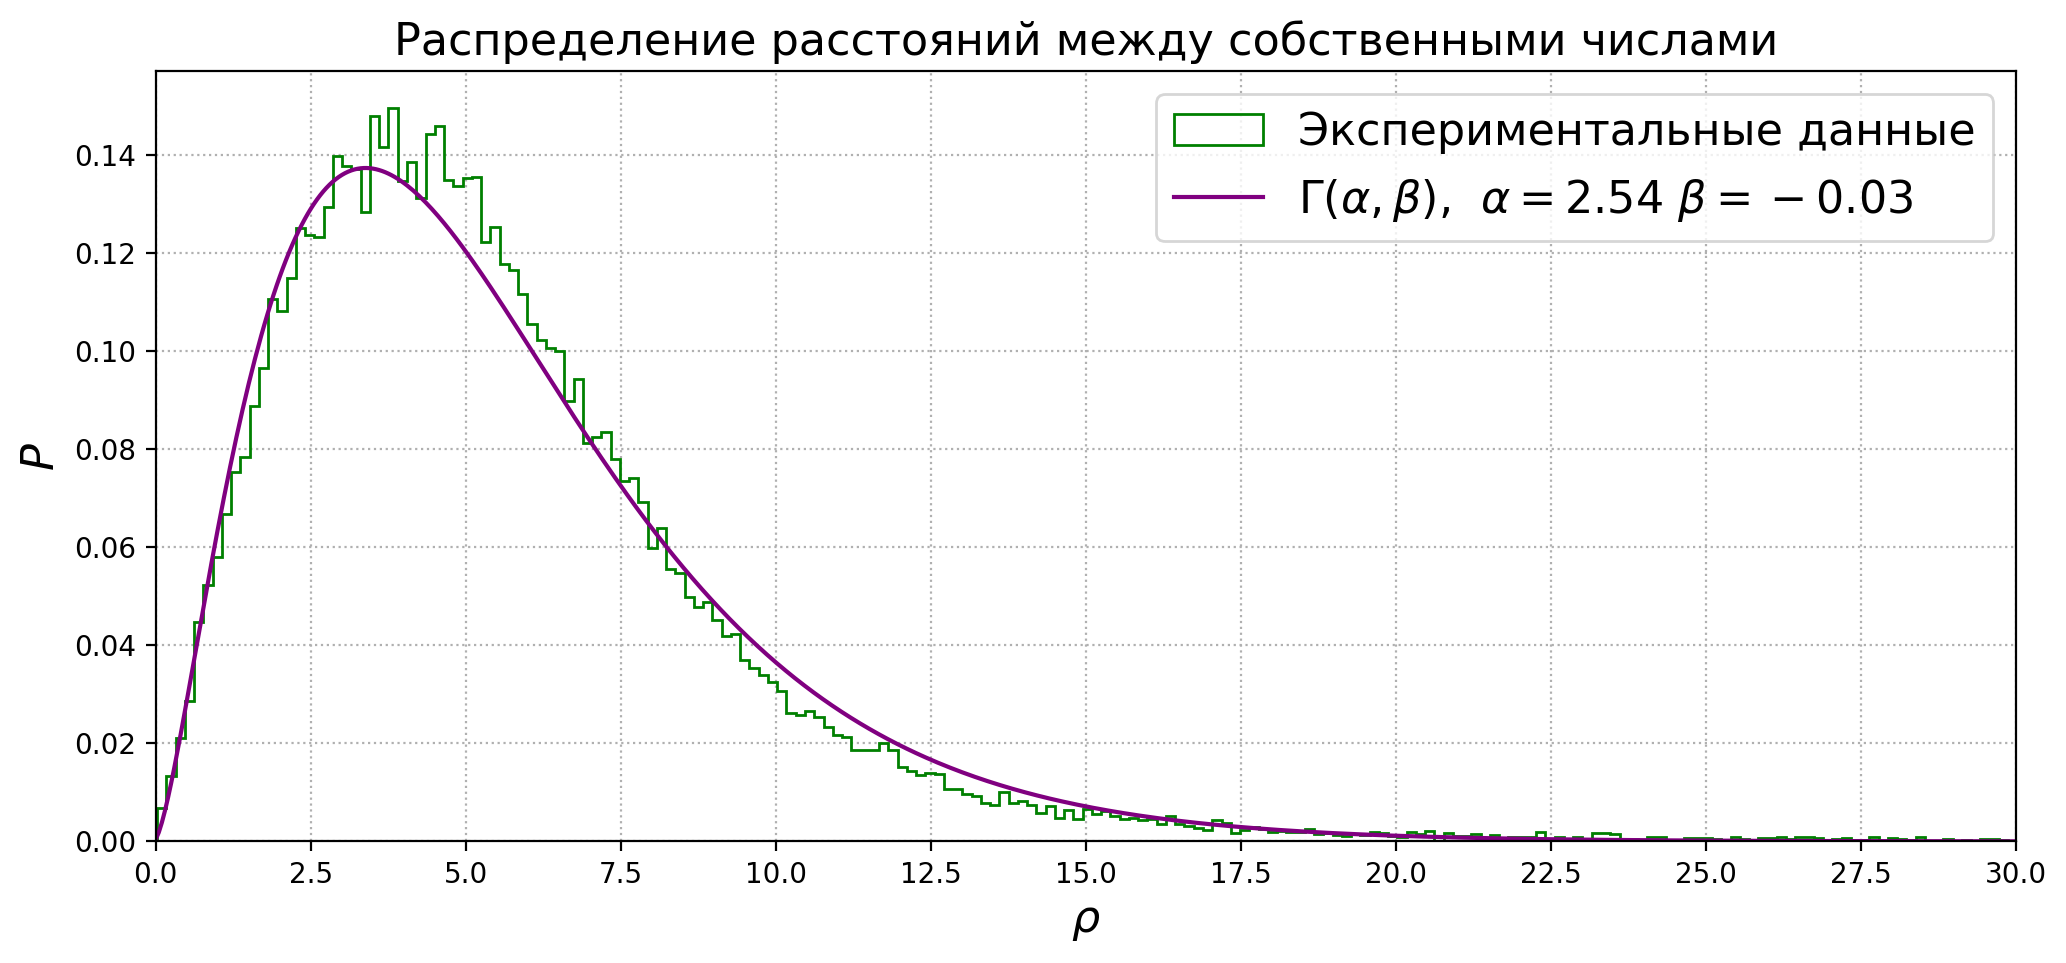

In [15]:
params = sps.gamma.fit(rho)
x = np.linspace(0, 50, 1000)
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(rho[rho < 30].ravel(), 
         bins = 200, 
         histtype = 'step', 
         density = True,
         color = 'green',
         label = 'Экспериментальные данные')
plt.title("Распределение расстояний между собственными числами", fontsize = 16)
plt.xlabel(r"$\rho$", fontsize = 16)
plt.ylabel(r"$P$", fontsize = 16)
plt.plot(x, 
         sps.gamma(*params).pdf(x),
         label = r"$\Gamma(\alpha, \beta)$,  $\alpha = " + str(round(params[0], 2)) + r' \ \beta = ' + str(round(params[1], 2)) + '$',
         color = 'purple')
plt.xticks(np.arange(0, 40, 2.5))
plt.xlim(0, 30)
plt.grid(ls = ':')
plt.legend(fontsize = 16)

__6.4__

Повторите предыдущие пункты для случайной гауссовой эрмитовой матрицы. Для того, чтобы ее сгенерировать, можно сначала сгенерировать случайную гауссову комплексную матрицу, а затем сложить ее с эрмитово сопряженной для нее.

In [16]:
eigenvals = []
N, M = 200, 100
for _ in range(M):
    A = np.random.normal(loc = 0, scale = 20, size = (N, N))
    B = np.random.normal(loc = 0, scale = 20, size = (N, N)) 
    M = A + 1.0j * B
    M_conj = A.T - 1.0j * B.T
    M += M_conj
    eigenvals.append(np.linalg.eigvals(M))
eigenvals = np.array(eigenvals).real

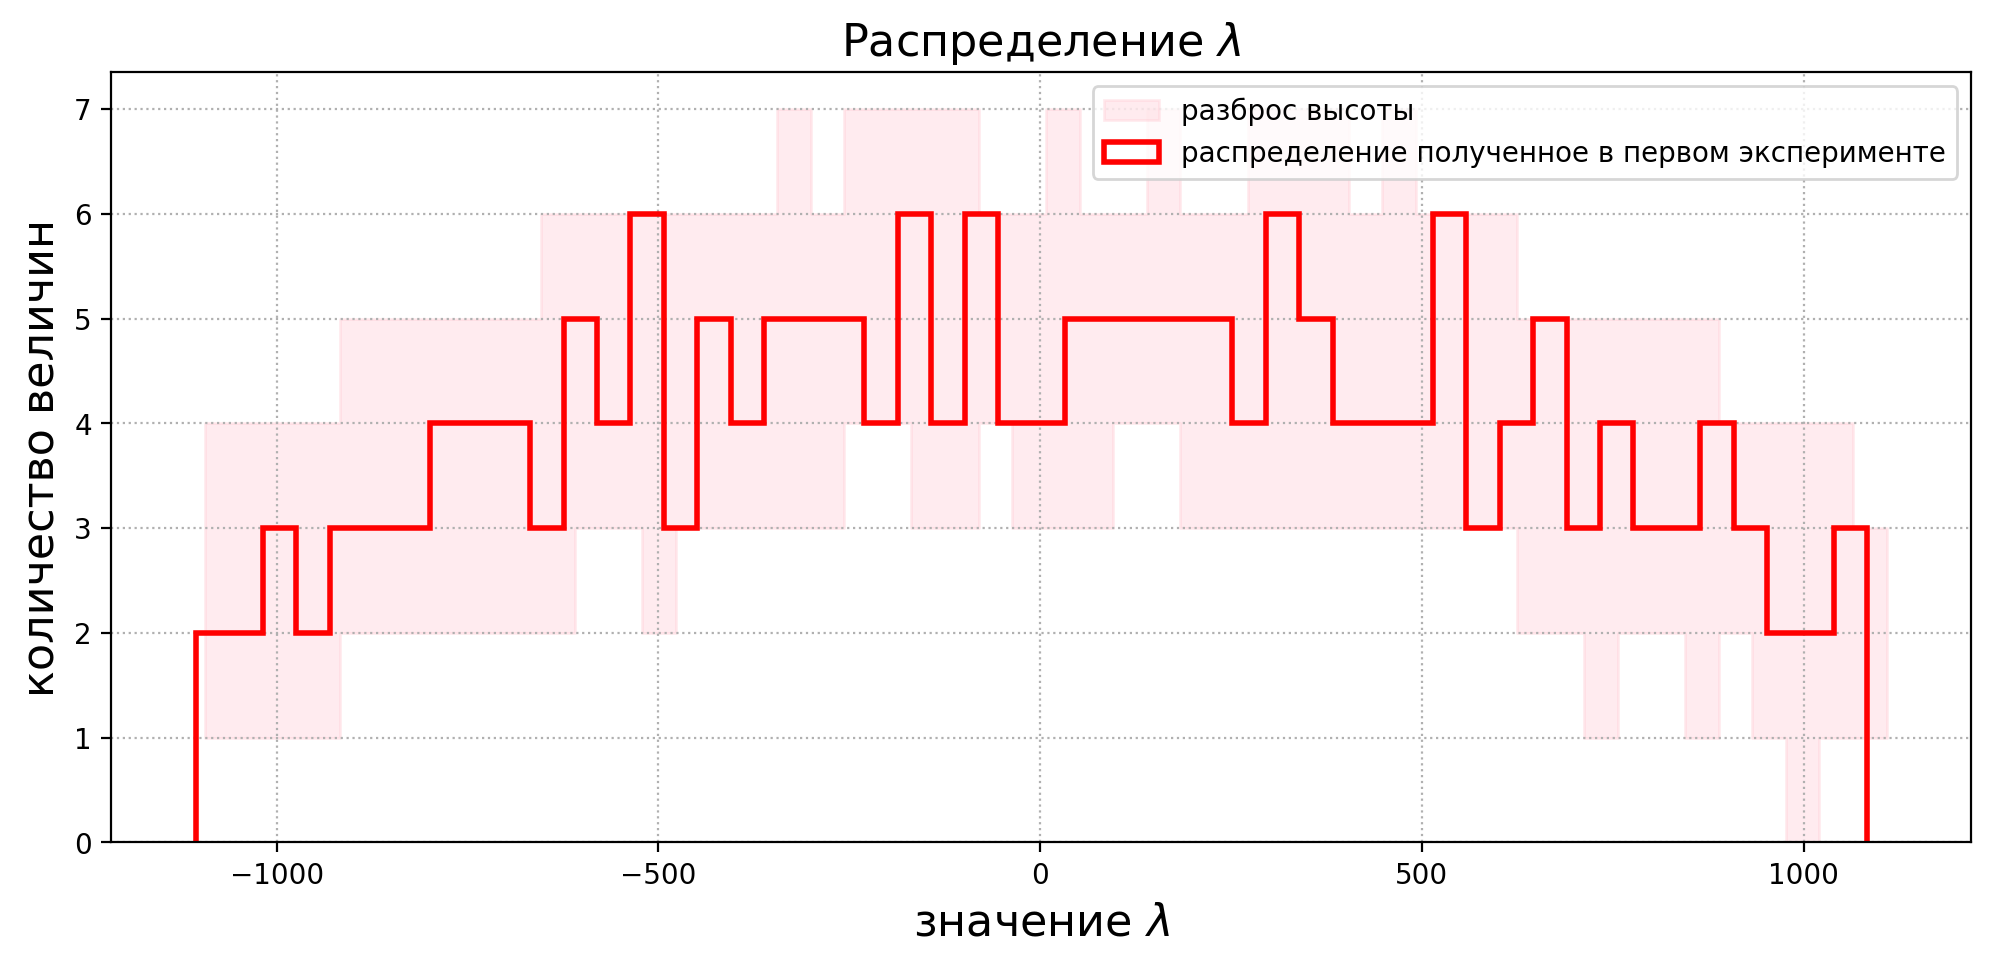

In [ ]:
plt.figure(figsize = (12, 5), dpi  = 200)
q_values = []
binq = 50
for val in eigenvals:
    q, edges = np.histogram(val, bins = binq)
    q_values.append(q)
q_values = np.array(q_values)
centers = (edges[:-1] + edges[1:]) / 2
x = np.sort(np.hstack([edges[:-1], centers, edges[1:]]))


plt.fill_between(x, 
                 y1 = np.repeat(np.min(q_values, axis = 0), 3), 
                 y2 = np.repeat(np.max(q_values, axis = 0), 3),
                 alpha = 0.3,
                 label = 'разброс высоты',
                 color = 'pink')

plt.hist(eigenvals[0], 
         bins = binq, 
         histtype = 'step',
         label = 'распределение полученное в первом эксперименте',
         linewidth = 2,
         color = 'red')


plt.grid(ls = ':')
plt.title("Распределение $\lambda$", fontsize = 16)
plt.xlabel("значение $\lambda$", fontsize = 16)
plt.ylabel("количество величин", fontsize = 16)
plt.legend();

In [ ]:
eigenvals_sorted = np.sort(eigenvals, axis = 1)
rho = np.abs(np.roll(eigenvals_sorted, -1, axis = 1) - eigenvals_sorted)
rho = rho[:, :-1]

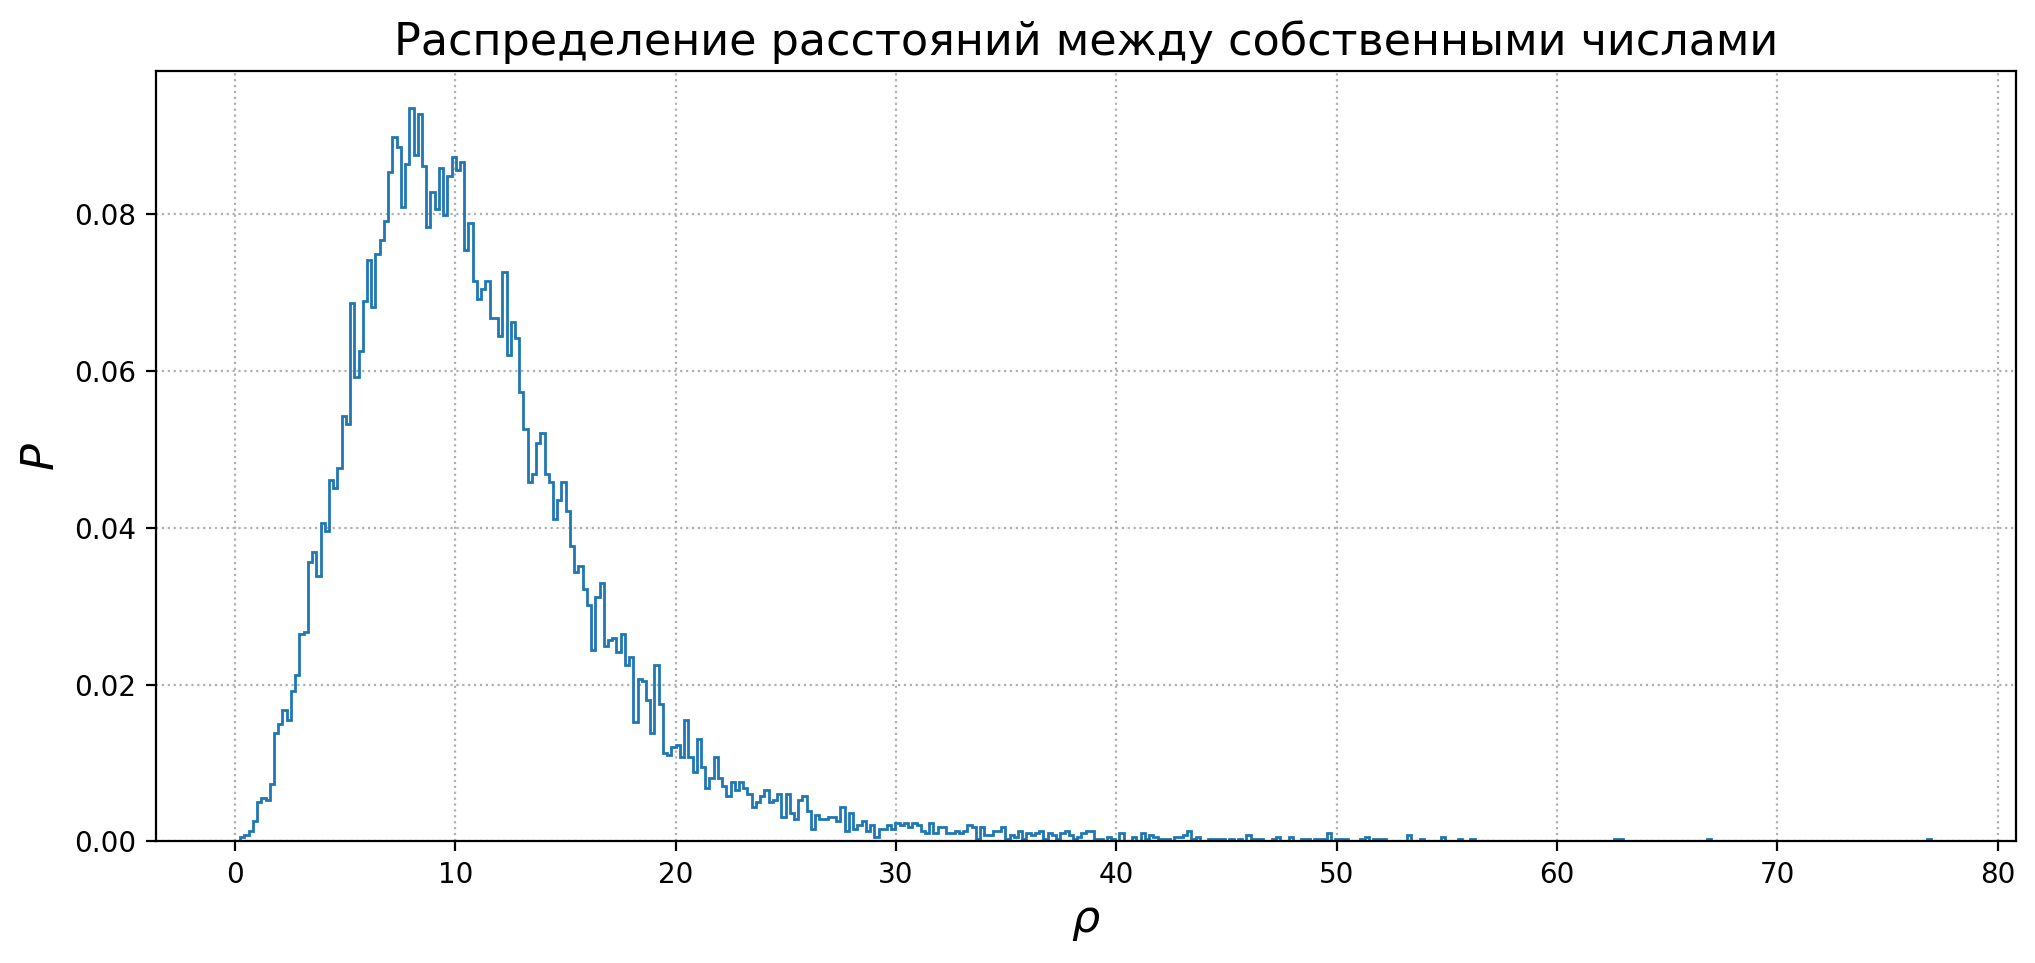

In [ ]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(rho.ravel(), bins = 400, histtype = 'step', density = True)
plt.title("Распределение расстояний между собственными числами", fontsize = 16)
plt.xlabel(r"$\rho$", fontsize = 16)
plt.ylabel(r"$P$", fontsize = 16)
plt.grid(ls = ':')

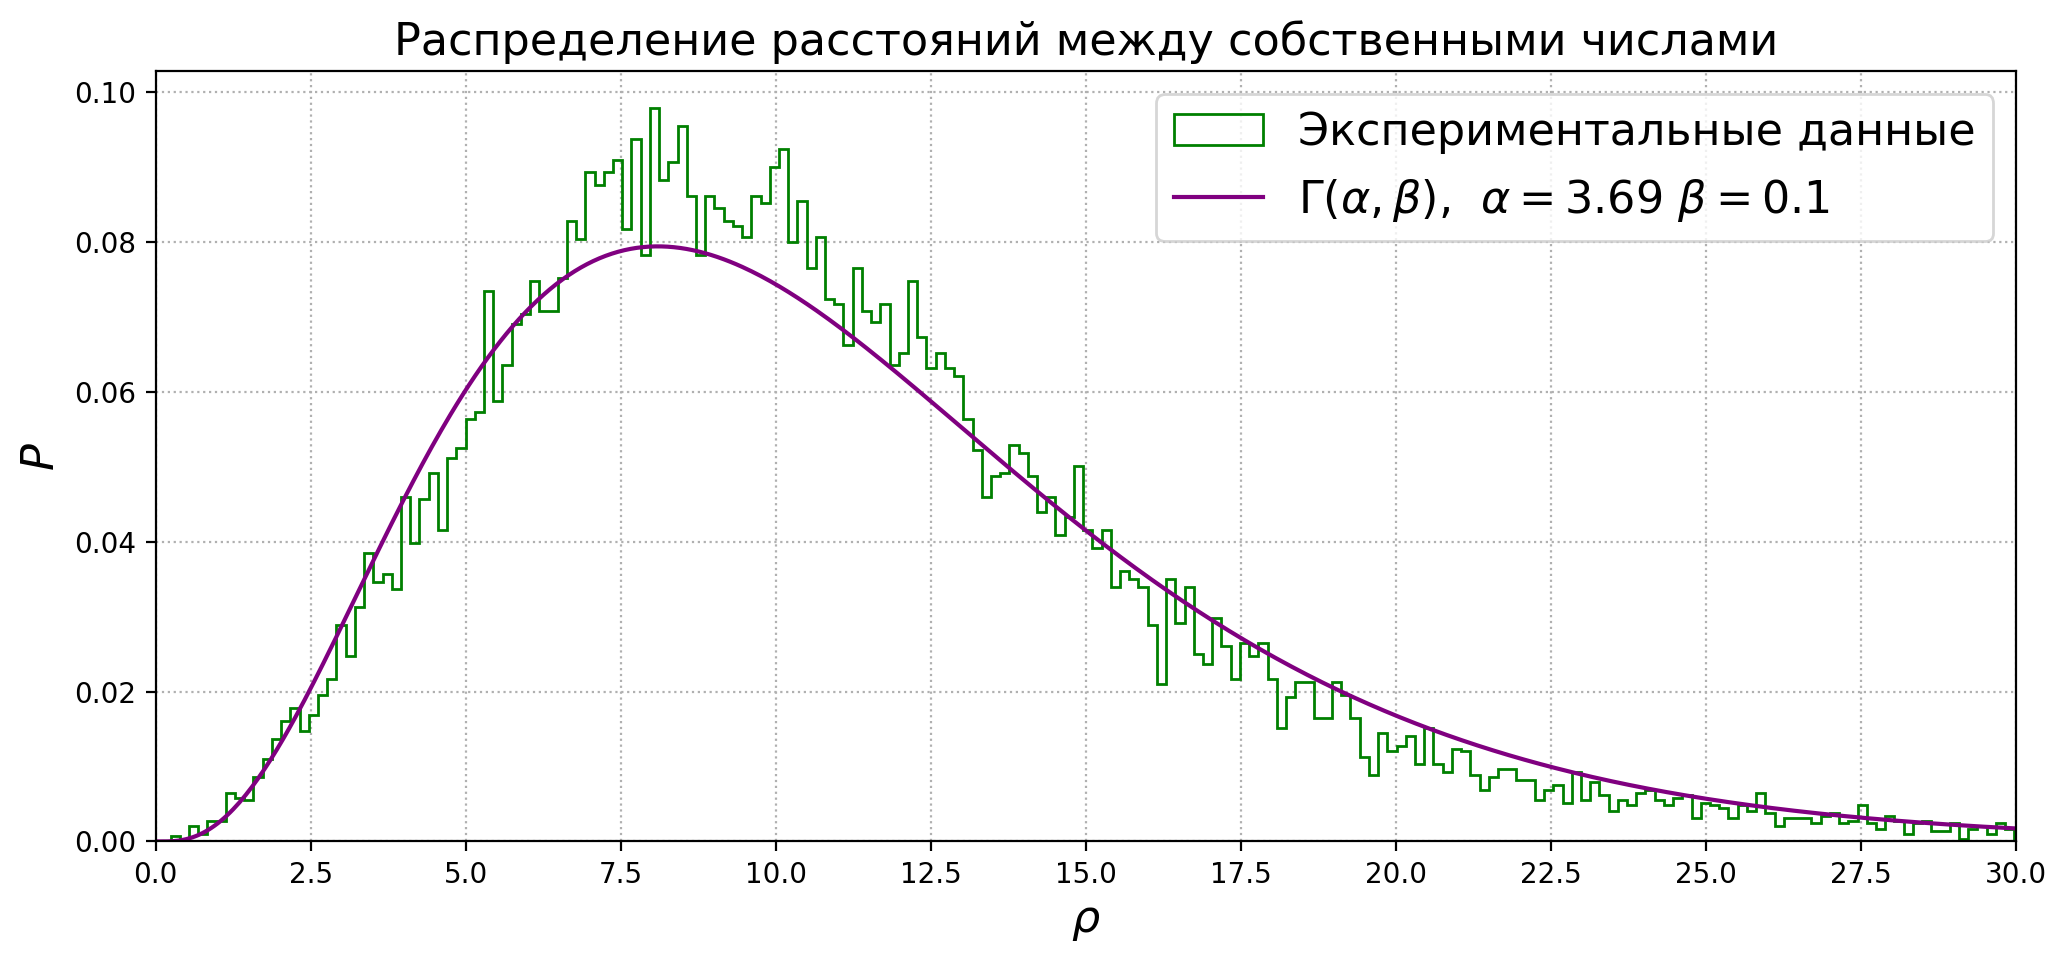

In [ ]:
params = sps.gamma.fit(rho)
x = np.linspace(0, 50, 1000)
plt.figure(figsize = (12, 5), dpi = 200)
plt.hist(rho[rho < 30].ravel(), 
         bins = 200, 
         histtype = 'step', 
         density = True,
         color = 'green',
         label = 'Экспериментальные данные')
plt.title("Распределение расстояний между собственными числами", fontsize = 16)
plt.xlabel(r"$\rho$", fontsize = 16)
plt.ylabel(r"$P$", fontsize = 16)
plt.plot(x, 
         sps.gamma(*params).pdf(x),
         label = r"$\Gamma(\alpha, \beta)$,  $\alpha = " + str(round(params[0], 2)) + r' \ \beta = ' + str(round(params[1], 2)) + '$',
         color = 'purple')
plt.xticks(np.arange(0, 40, 2.5))
plt.xlim(0, 30)
plt.grid(ls = ':')
plt.legend(fontsize = 16)